In [1]:
import pandas as pd
import numpy as np
#
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE


In [2]:
# managed PC 
PATH_TEST = r'E:\_Projects\_Under Construction Projects\Credit-score-classification\test.csv'
PATH_TRAIN=r'E:\_Projects\_Under Construction Projects\Credit-score-classification\train.csv'

In [3]:
df_train = pd.read_csv(PATH_TRAIN, encoding='utf-8', sep=',')
# df_test = pd.read_csv(PATH_TEST,encoding='utf-8',sep=',')


C:\Users\hp\AppData\Local\Temp\ipykernel_45752\3712790108.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(PATH_TRAIN, encoding='utf-8', sep=',')


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df_train.describe().T


,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [6]:
df_train.describe(include='object').T


,count,unique,top,freq
ID,100000,100000,0x1602,1
Customer_ID,100000,12500,CUS_0xd40,8
Month,100000,8,January,12500
Name,90015,10139,Langep,44
Age,100000,1788,38,2833
SSN,100000,12501,#F%$D@*&8,5572
Occupation,100000,16,_______,7062
Annual_Income,100000,18940,36585.12,16
Num_of_Loan,100000,434,3,14386
Type_of_Loan,88592,6260,Not Specified,1408


<AxesSubplot: >

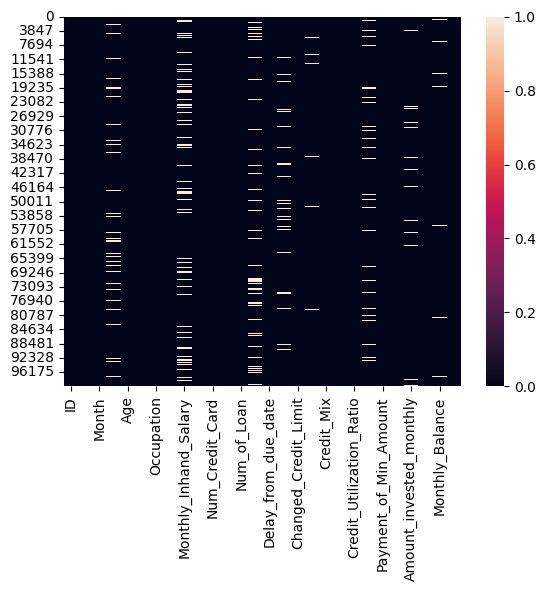

In [7]:
sns.heatmap(df_train.isnull())

# Preprocessing

## 02.Month

In [8]:
df_train['Month'].value_counts()

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [9]:
df_train['Month'].isnull().sum()

0

## 03.Name                      

In [15]:
df_train['Name'].value_counts()


Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64

In [12]:
df_train['Name'].isnull().sum()

9985

In [13]:
df_train[df_train['Name'].isnull()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
17,0x161b,CUS_0x2dbc,February,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,41.702573,17 Years and 10 Months,No,246.992319,232.86038375993544,High_spent_Small_value_payments,998.8692967863226,Good
22,0x1620,CUS_0x2dbc,July,NaN,34,486-85-3974,Engineer,143162.64,12187.220000,1,...,Good,1303.01,38.068624,18 Years and 3 Months,No,246.992319,263.17416316163934,High_spent_Small_value_payments,968.5555173846187,Standard
64,0x1662,CUS_0x4157,January,NaN,23,070-19-1622,Doctor,114838.41,9843.867500,2,...,Good,1377.74,33.664554,21 Years and 4 Months,No,226.892792,215.19351594560425,High_spent_Small_value_payments,802.3004421328528,Good
80,0x167a,CUS_0xa66b,January,NaN,40,221-30-8554,Teacher,33751.27,2948.605833,5,...,Standard,1328.93,37.089076,19 Years and 2 Months,NM,65.008174,117.30669710658556,High_spent_Medium_value_payments,362.54571194023237,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99964,0x25fba,CUS_0x372c,May,NaN,18,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,23.140640,28 Years and 5 Months,No,34.975457,450.6460933992599,Low_spent_Small_value_payments,151.210033,Good
99965,0x25fbb,CUS_0x372c,June,NaN,19,340-85-7301,Lawyer,42903.79,3468.315833,0,...,Good,1079.48,35.549456,28 Years and 6 Months,No,34.975457,187.3559686116327,Low_spent_Large_value_payments,394.500158,Good
99969,0x25fc3,CUS_0xf16,February,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good
99973,0x25fc7,CUS_0xf16,June,NaN,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,24.972853,21 Years and 6 Months,No,41.113561,__10000__,Low_spent_Small_value_payments,233.301539,Good


In [37]:
customer_id_name =  df_train[df_train['Name'].isnull()]['Customer_ID'].values

for Cid in customer_id_name :
    realName=''
    
    # realName_list = df_train.loc[df_train['Customer_ID']== Cid]['Name'].values
    realName = df_train.loc[(df_train['Customer_ID'] == 'CUS_0x1232') & (
        df_train['Name'].notna())]['Name'].values[0]
    
    df_train.loc[(df_train['Customer_ID'] == Cid) &(df_train['Name'].isna()), ['Name']] = realName


In [38]:
df_train[df_train['Name'].isnull()]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 04.Age

In [39]:
df_train['Age'].isnull().sum()


0

In [40]:
# We are have values = 28_
df_train['Age'] = [s.replace('_', '') for s in df_train['Age']]

# convert to int 
df_train['Age'] = df_train['Age'].astype(int)


# we are have values = -500
Customer_ID_age = df_train[df_train['Age'] < 0]['Customer_ID'].values


In [41]:
df_train[df_train['Age'] < 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
113,0x16ab,CUS_0xff4,February,Poornimaf,-500,655-05-7666,Entrepreneur,25546.26,NaN,8,...,Standard,758.44,29.711376,18 Years and 3 Months,Yes,101.328637,300.32323168069064,Low_spent_Small_value_payments,129.9336309554582,Standard
289,0x17b3,CUS_0x4080,February,ra Alperx,-500,995-37-8920,Mechanic,29469.98,2227.831667,7,...,Bad,3421.66,30.268411,13 Years and 3 Months,NM,69.685459,125.49176826031132,High_spent_Small_value_payments,287.6059398340756,Standard
340,0x17fe,CUS_0x9bc1,May,Jaisinghanij,-500,445-18-4420,Architect,20574.47,1740.539167,6,...,Standard,749.95,29.036164,11 Years and 3 Months,Yes,49.348666,139.97856227172545,Low_spent_Large_value_payments,254.72668807344257,Standard
560,0x194a,CUS_0x2827,January,Lisah,-500,486-07-1289,Scientist,144546.72,11809.560000,0,...,Good,1045.11,40.840687,22 Years and 11 Months,No,136.988557,573.4115904774258,High_spent_Small_value_payments,730.5558529037837,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99531,0x25d31,CUS_0x85dd,April,Lucianam,-500,767-36-7303,Lawyer,8974.555,NaN,10,...,Bad,1660.14,22.173985,16 Years and 6 Months,Yes,30.443262,27.83822717284169,Low_spent_Medium_value_payments,300.106469,Poor
99541,0x25d3f,CUS_0xc22f,June,McMillanw,-500,795-34-9348,Scientist,34671.15,2637.262500,4,...,Standard,1071.97,25.076571,21 Years and 8 Months,Yes,52.337589,104.78314244377886,High_spent_Small_value_payments,366.605518,Standard
99762,0x25e8c,CUS_0x1b07,March,Baldwinq,-500,739-15-8297,Accountant,17818.6,1659.883333,4,...,Standard,301.52,26.398987,18 Years and 5 Months,NM,11.581102,34.98032691383901,High_spent_Medium_value_payments,369.426905,Standard
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,-500,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard


In [50]:
df_train[df_train['Customer_ID'] == 'CUS_0xad4f']['Age'].drop_duplicates().values


array([47, 48])

In [49]:
for Cid in Customer_ID_age :
    realAge = df_train[df_train['Customer_ID'] =='CUS_0xad4f']['Age'].drop_duplicates().values[0]
    if realAge == -500 :
        realAge = df_train[df_train['Customer_ID'] =='CUS_0xad4f']['Age'].drop_duplicates().values[1]
    
    df_train.loc[(df_train['Customer_ID'] == Cid) & (df_train['Age']== -500), ['Age']] = realAge



In [51]:

df_train[df_train['Age'] < 0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 05.SSN

In [53]:
df_train['SSN'].value_counts()

SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64

In [54]:
df_train[df_train['SSN']=='#F%$D@*&8']

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7,0x1609,CUS_0xd40,August,Aaron Maashoh,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
29,0x162b,CUS_0xb891,June,Jasond,55,#F%$D@*&8,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
51,0x164d,CUS_0x284a,April,Nadiaq,34,#F%$D@*&8,Lawyer,131313.4,10469.207759,0,...,Good,352.16,42.645785,30 Years and 10 Months,No,23834.000000,337.43495631738324,High_spent_Medium_value_payments,899.1987716145285,Good
54,0x1650,CUS_0x284a,July,Nadiaq,34,#F%$D@*&8,Lawyer,10909427.0,NaN,0,...,Good,352.16,26.947565,31 Years and 1 Months,No,911.220179,930.3918977796665,!@9#%8,326.24183015224526,Good
98,0x1694,CUS_0x3e45,March,Harriet McLeodd,35,#F%$D@*&8,Entrepreneur,54392.16_,NaN,6,...,_,179.22,31.258928,27 Years and 0 Months,NM,124.392082,33.349568589344514,High_spent_Large_value_payments,558.9263489897351,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99914,0x25f70,CUS_0x1619,March,Phil Wahbao,54,#F%$D@*&8,Media_Manager,20059.98,1523.665000,8,...,Good,909.01,29.204711,16 Years and 5 Months,No,45.076827,111.56713873012444,Low_spent_Large_value_payments,265.722534,Poor
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,#F%$D@*&8,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.000000,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor
99946,0x25fa0,CUS_0x51b3,March,Ryana,33,#F%$D@*&8,Media_Manager,59146.36,4908.863333,2,...,Good,418.03,35.750925,20 Years and 3 Months,No,26.778419,188.54469705568923,High_spent_Medium_value_payments,525.563217,Standard
99968,0x25fc2,CUS_0xf16,January,Maria Sheahanb,44,#F%$D@*&8,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,39.868572,NaN,NM,41.113561,52.95197781627658,High_spent_Small_value_payments,318.737378,Good


In [56]:
df_train[df_train['Customer_ID'] == 'CUS_0x51b3' ]['SSN']


99944    837-85-9800
99945    837-85-9800
99946      #F%$D@*&8
99947    837-85-9800
99948    837-85-9800
99949    837-85-9800
99950    837-85-9800
99951    837-85-9800
Name: SSN, dtype: object

In [58]:
Customer_ID_SSN= df_train[df_train['SSN']=='#F%$D@*&8']['Customer_ID'].values
Customer_ID_SSN


array(['CUS_0xd40', 'CUS_0xb891', 'CUS_0x284a', ..., 'CUS_0x51b3',
       'CUS_0xf16', 'CUS_0x8600'], dtype=object)

In [57]:
df_train[df_train['Customer_ID'] == 'CUS_0x51b3']['SSN'].drop_duplicates().values


array(['837-85-9800', '#F%$D@*&8'], dtype=object)

In [59]:
for Cid in Customer_ID_SSN :
    realSSN = df_train[df_train['Customer_ID'] ==Cid]['SSN'].drop_duplicates().values[0]
    if realSSN == '#F%$D@*&8' :
        realSSN = df_train[df_train['Customer_ID'] ==Cid]['SSN'].drop_duplicates().values[1]

    df_train.loc[(df_train['Customer_ID'] == Cid) & (
        df_train['SSN'] == '#F%$D@*&8'), ['SSN']] = realSSN


In [60]:
df_train[df_train['SSN'] == '#F%$D@*&8']


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 06.Occupation

In [62]:
df_train['Occupation'].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [63]:
df_train['Occupation'].isnull().sum()

0

In [64]:
df_train[df_train['Occupation'] == '_______']


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
16,0x161a,CUS_0x2dbc,January,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
18,0x161c,CUS_0x2dbc,March,Langep,34,486-85-3974,_______,143162.64,NaN,1,...,Good,1303.01,26.519815,17 Years and 11 Months,No,246.992319,__10000__,High_spent_Small_value_payments,715.741367403555,Good
20,0x161e,CUS_0x2dbc,May,Langep,34,486-85-3974,_______,143162.64,12187.220000,1,...,Good,1303.01,31.376150,18 Years and 1 Months,No,246.992319,430.9475278803298,Low_spent_Large_value_payments,810.7821526659284,Good
29,0x162b,CUS_0xb891,June,Jasond,55,072-31-6145,_______,30689.89,2612.490833,2,...,_,632.46,27.445422,17 Years and 8 Months,No,16.415452,84.95284817115969,High_spent_Small_value_payments,419.8807835023488,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99920,0x25f7a,CUS_0x2654,January,enj,37,647-67-8889,_______,139664.96,11777.746667,3,...,_,365.66,31.043048,29 Years and 7 Months,Yes,423.731016,282.78234595777644,High_spent_Large_value_payments,711.261305,Standard
99935,0x25f8d,CUS_0xb11c,August,Yinka Adegokej,38,546-94-4789,_______,15319.65,1460.637500,6,...,Bad,1453.61,34.557510,11 Years and 4 Months,Yes,28.182033,191.87777851803025,Low_spent_Small_value_payments,216.003938,Poor
99937,0x25f93,CUS_0xad4f,February,Sabina Zawadzkig,47,226-45-0652,_______,22620.79,1722.065833,7,...,Standard,642.46,31.841872,NaN,No,0.000000,105.07629339039072,Low_spent_Large_value_payments,337.13029,Standard
99943,0x25f99,CUS_0xad4f,August,Sabina Zawadzkig,48,226-45-0652,_______,22620.79,NaN,6,...,_,642.46,34.026427,29 Years and 10 Months,No,0.000000,205.21728040016708,Low_spent_Small_value_payments,256.989303,Poor


In [70]:
df_train[df_train['Customer_ID']=='CUS_0x21b1']['Occupation'].drop_duplicates().values

array(['_______', 'Teacher'], dtype=object)

In [71]:
Customer_ID_Occupation = df_train[df_train['Occupation'] == '_______']['Customer_ID'].values
Customer_ID_Occupation


array(['CUS_0x21b1', 'CUS_0x2dbc', 'CUS_0x2dbc', ..., 'CUS_0xad4f',
       'CUS_0xad4f', 'CUS_0x8600'], dtype=object)

In [72]:
for Cid in Customer_ID_Occupation:
    realOcc = df_train[df_train['Customer_ID'] ==Cid]['Occupation'].drop_duplicates().values[0]
    if realOcc == '_______':
        realOcc = df_train[df_train['Customer_ID'] == Cid]['Occupation'].drop_duplicates().values[1]

    df_train.loc[(df_train['Customer_ID'] == Cid) & (
        df_train['Occupation'] == '_______'), ['Occupation']] = realOcc


In [73]:
df_train[df_train['Occupation'] == '_______']


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 07.Annual_Income ??

**-

In [74]:
df_train['Annual_Income'].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64

In [76]:
# We are have values = 280.60_
df_train['Annual_Income'] = [s.replace('_', '')for s in df_train['Annual_Income']]

# convert to float 
df_train['Annual_Income'] = df_train['Annual_Income'].astype('Float64')


In [77]:
df_train['Annual_Income'].value_counts()


Annual_Income
17816.75      16
22434.16      16
40341.16      16
17273.83      16
109945.32     16
              ..
17079092.0     1
1910572.0      1
20179076.0     1
7980216.0      1
8299495.0      1
Name: count, Length: 13487, dtype: Int64

In [84]:
df_train[df_train['Customer_ID']=='CUS_0xb1a0']

# 15823.87 != 24188807.0


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
7808,0x43c2,CUS_0xb1a0,January,Wachtelm,16,249-90-4145,Lawyer,15823.87,1067.655833,8,...,Bad,3703.96,25.588341,9 Years and 7 Months,NM,87.323423,99.07399074310513,Low_spent_Medium_value_payments,200.3681694156384,Standard
7809,0x43c3,CUS_0xb1a0,February,Wachtelm,16,249-90-4145,Lawyer,15823.87,1067.655833,8,...,Bad,3703.96,36.078312,9 Years and 8 Months,Yes,87.323423,105.70751659030519,Low_spent_Medium_value_payments,193.73464356843837,Standard
7810,0x43c4,CUS_0xb1a0,March,Wachtelm,17,249-90-4145,Lawyer,15823.87,1067.655833,8,...,Bad,3703.96,39.254236,9 Years and 9 Months,Yes,87.323423,88.56711986006992,Low_spent_Small_value_payments,220.87504029867364,Standard
7811,0x43c5,CUS_0xb1a0,April,Wachtelm,17,249-90-4145,Lawyer,15823.87,1067.655833,8,...,Bad,3703.96,24.737620,NaN,Yes,87.323423,24.37781398055323,High_spent_Small_value_payments,255.0643461781903,Standard
7812,0x43c6,CUS_0xb1a0,May,Wachtelm,17,249-90-4145,Lawyer,15823.87,1067.655833,8,...,Bad,3703.96,25.288201,9 Years and 11 Months,Yes,87.323423,72.25827418609045,Low_spent_Small_value_payments,237.18388597265312,Standard
7813,0x43c7,CUS_0xb1a0,June,Wachtelm,17,249-90-4145,Lawyer,15823.87,1067.655833,8,...,_,3703.96,29.886193,10 Years and 0 Months,Yes,87.323423,119.8260358744297,Low_spent_Small_value_payments,189.61612428431386,Standard
7814,0x43c8,CUS_0xb1a0,July,Wachtelm,17,249-90-4145,Lawyer,24188807.0,1067.655833,8,...,_,3703.96,41.268945,10 Years and 1 Months,NM,87.323423,25.385696011834174,High_spent_Small_value_payments,254.05646414690938,Standard
7815,0x43c9,CUS_0xb1a0,August,Wachtelm,17,249-90-4145,Lawyer,15823.87,1067.655833,8,...,Bad,3703.96,25.124653,10 Years and 2 Months,Yes,87.323423,100.44800015346165,Low_spent_Small_value_payments,208.9941600052819,Standard


In [91]:
df_train[df_train['Customer_ID'] == 'CUS_0xb1a0']['Annual_Income'].min(
)== df_train[df_train['Customer_ID'] == 'CUS_0xb1a0']['Annual_Income'].max()


False

In [104]:
df_train[df_train['Customer_ID'] == 'CUS_0xb1a0']['Annual_Income'].values


<FloatingArray>
[  15823.87,   15823.87,   15823.87,   15823.87,   15823.87,   15823.87,
 24188807.0,   15823.87]
Length: 8, dtype: Float64

In [106]:
[df_train[df_train['Customer_ID'] == 'CUS_0xb1a0']
    ['Annual_Income'].values].count(15823.87)


1

In [ ]:
# هنسيبها لبكره . بص الفكره عايزين نشوف الرقم ده اتكرر كام مره ولو اقل من  عدد الليست يبقي في رقم غلط موجود مفروض نعدله

## 08.Monthly_Inhand_Salary ??

5rban

In [108]:
df_train['Monthly_Inhand_Salary'].value_counts()

Monthly_Inhand_Salary
6769.130000    15
6358.956667    15
2295.058333    15
6082.187500    15
3080.555000    14
               ..
1087.546445     1
3189.212103     1
5640.117744     1
7727.560450     1
2443.654131     1
Name: count, Length: 13235, dtype: int64

In [110]:
df_train['Monthly_Inhand_Salary'].isnull().sum()

15002

In [111]:
df_train[df_train['Monthly_Inhand_Salary'].isna()]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,47,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
11,0x1611,CUS_0x21b1,April,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,NaN,2,...,Good,605.03,39.182656,26 Years and 10 Months,No,18.816215,99.30622796053305,Low_spent_Medium_value_payments,465.6762241330048,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99944,0x25f9e,CUS_0x51b3,January,Ryana,33,837-85-9800,Media_Manager,59146.36,NaN,2,...,_,418.03,34.720661,NaN,No,26.778419,606.4365424304076,Low_spent_Small_value_payments,147.671372,Standard
99955,0x25fad,CUS_0x2084,April,Ryanl,21,253-72-7758,Architect,38321.39,NaN,4,...,Good,678.57,35.455305,17 Years and 2 Months,No,362.072453,293.71319332766717,Low_spent_Large_value_payments,197.460577,Standard
99963,0x25fb9,CUS_0x372c,April,Lucia Mutikanik,47,340-85-7301,Lawyer,42903.79,NaN,0,...,Good,1079.48,30.625298,NaN,No,34.975457,31.19391926667726,High_spent_Large_value_payments,520.662207,Standard
99975,0x25fc9,CUS_0xf16,August,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,NaN,1,...,Good,897.16,41.212367,NaN,No,41.113561,70.8055497847255,Low_spent_Large_value_payments,310.883806,Good


In [112]:
df_train[df_train['Customer_ID']=='CUS_0xd40']['Monthly_Inhand_Salary']

0    1824.843333
1            NaN
2            NaN
3            NaN
4    1824.843333
5            NaN
6    1824.843333
7    1824.843333
Name: Monthly_Inhand_Salary, dtype: float64

In [115]:
df_train[df_train['Customer_ID'] =='CUS_0xd40']['Monthly_Inhand_Salary'].drop_duplicates().values


array([1824.84333333,           nan])

In [116]:
Customer_ID_MIS = df_train[df_train['Monthly_Inhand_Salary'].isna()]['Customer_ID'].values
Customer_ID_MIS


array(['CUS_0xd40', 'CUS_0xd40', 'CUS_0xd40', ..., 'CUS_0x372c',
       'CUS_0xf16', 'CUS_0xaf61'], dtype=object)

In [140]:
l = df_train[df_train['Customer_ID'] ==
             'CUS_0x5407']['Monthly_Inhand_Salary'].drop_duplicates().values[0]

l


nan

In [143]:
for Cid in Customer_ID_MIS:
    realMis = df_train[df_train['Customer_ID'] == Cid]['Monthly_Inhand_Salary'].drop_duplicates().values[0]
    if realMis == l :
        realMis = df_train[df_train['Customer_ID'] == Cid]['Monthly_Inhand_Salary'].drop_duplicates().values[1]

    df_train.loc[(df_train['Customer_ID'] == Cid) & (df_train['Monthly_Inhand_Salary'].isna()), ['Monthly_Inhand_Salary']] = realMis


IndexError: index 1 is out of bounds for axis 0 with size 1

In [142]:
df_train[df_train['Monthly_Inhand_Salary'].isna()]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
40,0x163e,CUS_0x95ee,January,Np,31,612-70-8987,Lawyer,73928.46,NaN,4,...,Good,548.2,39.962685,NaN,No,15015.000000,98.67440994166124,High_spent_Large_value_payments,740.1960900583389,Good
56,0x1656,CUS_0x5407,January,Annk,7580,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,24.448063,NaN,NM,70.478333,162.4410091967751,Low_spent_Large_value_payments,298.19215813115227,Poor
58,0x1658,CUS_0x5407,March,Annk,30,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,35.111552,14 Years and 9 Months,Yes,70.478333,199.7207654954979,Low_spent_Large_value_payments,260.9124018324295,Poor
62,0x165c,CUS_0x5407,July,Annk,30,500-92-6408,Media_Manager,34081.38,NaN,8,...,Standard,1704.18,38.438505,15 Years and 1 Months,NM,70.478333,55.45978063925893,High_spent_Small_value_payments,395.17338668866836,Standard
104,0x169e,CUS_0x6c66,January,Sinead Carews,39,328-33-6328,Manager,8701.545,NaN,6,...,_,2602.69,24.523164,8 Years and 11 Months,Yes,36.548197,13.066209919444336,Low_spent_Large_value_payments,272.2984679091685,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99821,0x25ee3,CUS_0x40ad,June,Dorisw,20,715-14-3312,Scientist,65858.48,NaN,7,...,Standard,2344.57,30.354016,6 Years and 9 Months,NM,261.201218,211.38179106139916,High_spent_Medium_value_payments,319.537658,Standard
99888,0x25f4a,CUS_0x89aa,January,Lawderr,38,018-63-7005,Manager,85744.12,NaN,6,...,Standard,717.79,27.777284,15 Years and 3 Months,Yes,72.099176,160.09087700920955,High_spent_Large_value_payments,720.34428,Standard
99892,0x25f4e,CUS_0x89aa,May,Kwokw,38,018-63-7005,Manager,85744.12,NaN,6,...,Standard,717.79,29.513156,NaN,Yes,72.099176,88.01045806206517,High_spent_Large_value_payments,792.424699,Standard
99928,0x25f86,CUS_0xb11c,January,Yinka Adegokej,38,546-94-4789,Manager,15319.65,NaN,6,...,Bad,1453.61,36.518222,10 Years and 9 Months,Yes,28.182033,167.88843516537085,Low_spent_Small_value_payments,239.993281,Poor


numpy.float64

## 09.Num_Bank_Accounts

In [144]:
df_train['Num_Bank_Accounts'].value_counts()

Num_Bank_Accounts
6       13001
7       12823
8       12765
4       12186
5       12118
        ...  
1626        1
1470        1
887         1
211         1
697         1
Name: count, Length: 943, dtype: int64

In [145]:
df_train['Num_Bank_Accounts'].isnull().sum()

0

In [146]:
df_train['Num_Bank_Accounts'].describe()

count    100000.000000
mean         17.091280
std         117.404834
min          -1.000000
25%           3.000000
50%           6.000000
75%           7.000000
max        1798.000000
Name: Num_Bank_Accounts, dtype: float64

In [148]:
df_train[df_train['Num_Bank_Accounts'] < 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
30330,0xc7b8,CUS_0x4f2a,March,Margaretf,39,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,40.586736,22 Years and 5 Months,No,196.587321,230.9223857499363,High_spent_Large_value_payments,855.9049597507532,Standard
30331,0xc7b9,CUS_0x4f2a,April,Margaretf,40,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7_,39.369401,22 Years and 6 Months,No,196.587321,524.3044177743545,Low_spent_Large_value_payments,592.522927726335,Good
30332,0xc7ba,CUS_0x4f2a,May,Margaretf,40,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,28.702053,22 Years and 7 Months,No,196.587321,150.0966753535676,High_spent_Large_value_payments,936.7306701471217,Good
30333,0xc7bb,CUS_0x4f2a,June,Margaretf,40,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,34.808390,22 Years and 8 Months,No,196.587321,1006.6980690205388,Low_spent_Medium_value_payments,120.12927648015079,Good
30334,0xc7bc,CUS_0x4f2a,July,Margaretf,40,807-03-5415,Engineer,128305.76,10434.146667,-1,...,Good,1151.7,35.206427,NaN,No,42850.000000,172.99202124673786,High_spent_Large_value_payments,913.8353242539515,Good
30335,0xc7bd,CUS_0x4f2a,August,Margaretf,40,807-03-5415,Engineer,22136920.0,10434.146667,-1,...,_,1151.7,38.278518,22 Years and 10 Months,No,196.587321,338.67230317776176,High_spent_Medium_value_payments,758.1550423229277,Good
43689,0x115ff,CUS_0xa878,February,Douwe Miedemaz,54,300-54-4627,Engineer,117851.07,9870.922500,-1,...,Good,607.78,37.286105,20 Years and 6 Months,No,0.000000,668.1444536762707,!@9#%8,588.9477963237292,Poor
43690,0x11600,CUS_0xa878,March,Douwe Miedemaz,54,300-54-4627,Engineer,117851.07,9870.922500,-1,...,Good,607.78,41.915627,20 Years and 7 Months,No,0.000000,142.31978881674561,High_spent_Large_value_payments,1084.7724611832548,Poor
43691,0x11601,CUS_0xa878,April,Douwe Miedemaz,54,300-54-4627,Engineer,117851.07,9870.922500,-1,...,Good,607.78,41.799942,20 Years and 8 Months,No,0.000000,467.563922615828,High_spent_Small_value_payments,779.528327384172,Poor
43692,0x11602,CUS_0xa878,May,Douwe Miedemaz,54,300-54-4627,Engineer,117851.07,9870.922500,-1,...,Good,607.78,46.244581,20 Years and 9 Months,No,0.000000,NaN,High_spent_Large_value_payments,1037.5063384360787,Poor


In [150]:
df_train[df_train['Customer_ID'] == 'CUS_0x5993']['Num_Bank_Accounts']


55632    0
55633    0
55634    0
55635    0
55636   -1
55637   -1
55638   -1
55639   -1
Name: Num_Bank_Accounts, dtype: int64

In [151]:
Customer_ID_NBA = df_train[df_train['Num_Bank_Accounts'] < 0]['Customer_ID'].values

Customer_ID_NBA


array(['CUS_0x4f2a', 'CUS_0x4f2a', 'CUS_0x4f2a', 'CUS_0x4f2a',
       'CUS_0x4f2a', 'CUS_0x4f2a', 'CUS_0xa878', 'CUS_0xa878',
       'CUS_0xa878', 'CUS_0xa878', 'CUS_0xa878', 'CUS_0xa878',
       'CUS_0xa878', 'CUS_0x43bc', 'CUS_0x43bc', 'CUS_0x43bc',
       'CUS_0x43bc', 'CUS_0x5993', 'CUS_0x5993', 'CUS_0x5993',
       'CUS_0x5993'], dtype=object)

In [152]:
for i in Customer_ID_NBA:
    df_train.loc[(df_train['Customer_ID'] == i) & (
    df_train['Num_Bank_Accounts']== -1), ['Num_Bank_Accounts']] = 0

df_train[df_train['Num_Bank_Accounts'] < 0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 10.Num_Credit_Card

In [153]:
df_train['Num_Credit_Card'].value_counts()

Num_Credit_Card
5       18459
7       16615
6       16559
4       14030
3       13277
        ...  
791         1
1118        1
657         1
640         1
679         1
Name: count, Length: 1179, dtype: int64

In [157]:
df_train[df_train['Num_Credit_Card'] < 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 11.Interest_Rate

In [158]:
df_train['Interest_Rate'].value_counts()

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64

In [159]:
df_train['Interest_Rate'].isnull().sum()

0

In [160]:
df_train[df_train['Interest_Rate']<0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 12.Num_of_Loan

In [161]:
df_train['Num_of_Loan'].value_counts()

Num_of_Loan
3        14386
2        14250
4        14016
0        10380
1        10083
         ...  
1320_        1
103          1
1444         1
392          1
966          1
Name: count, Length: 434, dtype: int64

In [163]:
# We are have values = 23058_
df_train['Num_of_Loan'] = [s.replace('_', '') for s in df_train['Num_of_Loan']]

# convert to int
df_train['Num_of_Loan'] = df_train['Num_of_Loan'].astype(int)


In [164]:
df_train[df_train['Num_of_Loan'] < 0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
31,0x162d,CUS_0xb891,August,Jasond,55,072-31-6145,Entrepreneur,30689.89,2612.490833,2,...,Good,632.46,27.332515,17 Years and 10 Months,No,16.415452,125.61725053231268,High_spent_Small_value_payments,379.21638114119577,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.000000,173.13865100158367,Low_spent_Medium_value_payments,392.1922656650829,Standard
39,0x1639,CUS_0x1cdb,August,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,25.862922,31 Years and 3 Months,Yes,0.000000,181.33090096186916,High_spent_Small_value_payments,364.00001570479753,Standard
53,0x164f,CUS_0x284a,June,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,41.980170,31 Years and 0 Months,No,911.220179,86.56638801207531,High_spent_Large_value_payments,1140.0673399198365,Standard
61,0x165b,CUS_0x5407,June,Annk,30,500-92-6408,Media_Manager,34081.38,2611.115000,8,...,Standard,1704.18,31.170872,15 Years and 0 Months,Yes,70.478333,NaN,!@9#%8,410.6743660782873,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99877,0x25f37,CUS_0x3855,June,Xolai,6476,963-55-7106,Scientist,118677.54,9963.795000,4,...,Good,995.47,38.556181,30 Years and 4 Months,No,237.106366,231.2765296325449,High_spent_Large_value_payments,767.996604,Good
99901,0x25f5b,CUS_0x4986,June,Charles Abbotta,34,971-61-8388,Entrepreneur,41329.56,3421.130000,2,...,_,1245.01,32.846273,23 Years and 8 Months,No,20.553577,272.7925038930821,Low_spent_Large_value_payments,318.766919,Good
99902,0x25f5c,CUS_0x4986,July,Charles Abbotta,34,971-61-8388,Entrepreneur,41329.56,3421.130000,2,...,Good,1245.01,39.011550,23 Years and 9 Months,No,20.553577,462.1176338205343,Low_spent_Small_value_payments,149.44179,Good
99969,0x25fc3,CUS_0xf16,February,Maria Sheahanb,45,868-70-2218,Media_Manager,16680.35,1528.029167,1,...,Good,897.16,34.085971,21 Years and 2 Months,No,41.113561,104.64623687765652,High_spent_Small_value_payments,267.043119,Good


In [166]:
df_train[df_train['Customer_ID']=='CUS_0xb891']['Num_of_Loan']

24      1
25      1
26      1
27      1
28      1
29      1
30      1
31   -100
Name: Num_of_Loan, dtype: int32

In [167]:
df_train[df_train['Customer_ID']=='CUS_0xb891']['Num_of_Loan'].drop_duplicates().values


array([   1, -100])

In [168]:
Customer_ID_NOL = df_train[df_train['Num_of_Loan'] < 0]['Customer_ID'].values
Customer_ID_NOL


array(['CUS_0xb891', 'CUS_0x1cdb', 'CUS_0x1cdb', ..., 'CUS_0x4986',
       'CUS_0xf16', 'CUS_0x8600'], dtype=object)

In [169]:
for  i in Customer_ID_NOL :
    real_loan = df_train[df_train['Customer_ID'] =='CUS_0xb891']['Num_of_Loan'].drop_duplicates().values[0]
    if real_loan < 0:
        real_loan = df_train[df_train['Customer_ID'] =='CUS_0xb891']['Num_of_Loan'].drop_duplicates().values[1]

    df_train.loc[(df_train['Customer_ID']==i)&(df_train['Num_of_Loan']<0) , ['Num_of_Loan']]= real_loan


df_train[df_train['Num_of_Loan'] < 0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


## 13.Type_of_Loan ??

In [170]:
df_train['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                 8
Payday Loan, M

In [171]:
df_train['Type_of_Loan'].isnull().sum()

11408

In [173]:
df_train[df_train['Type_of_Loan'].isna()]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
32,0x1632,CUS_0x1cdb,January,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,39.797764,30 Years and 8 Months,Yes,0.0,276.72539431736266,!@9#%8,288.60552234930395,Standard
33,0x1633,CUS_0x1cdb,February,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,27.020360,30 Years and 9 Months,NM,0.0,74.44364104999623,High_spent_Medium_value_payments,460.88727561667037,Standard
34,0x1634,CUS_0x1cdb,March,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,Standard,943.86,23.462303,30 Years and 10 Months,Yes,0.0,173.13865100158367,Low_spent_Medium_value_payments,392.1922656650829,Standard
35,0x1635,CUS_0x1cdb,April,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,_,943.86,28.924954,30 Years and 11 Months,Yes,0.0,96.78548508587444,High_spent_Medium_value_payments,438.5454315807922,Standard
36,0x1636,CUS_0x1cdb,May,Deepaa,21,615-06-7821,Developer,35547.71,2853.309167,7,...,_,943.86,41.776187,31 Years and 0 Months,Yes,0.0,62.72327834435009,High_spent_Small_value_payments,482.6076383223166,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99939,0x25f95,CUS_0xad4f,April,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,_,642.46,26.730863,29 Years and 6 Months,NM,0.0,205.75607405146,Low_spent_Small_value_payments,256.450509,Poor
99940,0x25f96,CUS_0xad4f,May,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,Standard,642.46,37.450793,29 Years and 7 Months,No,0.0,141.895743423042,Low_spent_Large_value_payments,300.31084,Standard
99941,0x25f97,CUS_0xad4f,June,Sabina Zawadzkig,47,226-45-0652,Developer,22620.79,1722.065833,7,...,Standard,642.46,27.699504,NaN,No,0.0,207.47345558788197,Low_spent_Small_value_payments,254.733128,Poor
99942,0x25f98,CUS_0xad4f,July,Sabina Zawadzkig,48,226-45-0652,Developer,22620.79,1722.065833,6,...,Standard,642.46,24.714779,29 Years and 9 Months,No,0.0,16.53218878920387,High_spent_Large_value_payments,395.674395,Poor


In [179]:
df_train[df_train['Customer_ID']=='CUS_0xad4f']['Type_of_Loan']

99936    NaN
99937    NaN
99938    NaN
99939    NaN
99940    NaN
99941    NaN
99942    NaN
99943    NaN
Name: Type_of_Loan, dtype: object

In [183]:
df_train[df_train['Num_of_Loan']==1]['Type_of_Loan'].value_counts()

Type_of_Loan
Not Specified                                                                                                                                     1403
Credit-Builder Loan                                                                                                                               1268
Personal Loan                                                                                                                                     1263
Debt Consolidation Loan                                                                                                                           1253
Student Loan                                                                                                                                      1235
                                                                                                                                                  ... 
Student Loan, Credit-Builder Loan, Not Specified, and Auto Loan                  

In [ ]:
# بص علي الفيتشر اللي قبله او هنا هنستخدم knn imputer ارق اكيد

## 14.Delay_from_due_date ???

In [185]:
df_train['Delay_from_due_date'].value_counts()

Delay_from_due_date
 15    3596
 13    3424
 8     3324
 14    3313
 10    3281
       ... 
-4       62
 65      56
-5       33
 66      32
 67      22
Name: count, Length: 73, dtype: int64

In [186]:
df_train[df_train['Delay_from_due_date']<0]


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
49,0x164b,CUS_0x284a,February,Nadiaq,34,411-51-0676,Lawyer,131313.4,11242.783333,0,...,Good,352.16,31.983710,30 Years and 8 Months,No,137.644605,698.8732707169384,High_spent_Small_value_payments,547.7604572149734,Good
74,0x1670,CUS_0xba08,March,Jamesj,44,366-68-1681,Journalist,31370.8,2825.233333,1,...,Good,421.43,31.046418,26 Years and 7 Months,No,46.616129,140.8206959818371,Low_spent_Medium_value_payments,375.0865082781542,Good
78,0x1674,CUS_0xba08,July,Jamesj,45,366-68-1681,Journalist,31370.8,2825.233333,1,...,Good,421.43,22.762202,26 Years and 11 Months,No,46.616129,188.3949004901688,Low_spent_Small_value_payments,337.51230376982244,Good
79,0x1675,CUS_0xba08,August,Jamesj,45,366-68-1681,Journalist,31370.8,2825.233333,1,...,_,421.43,37.565053,27 Years and 0 Months,No,46.616129,252.6448271968889,Low_spent_Small_value_payments,273.2623770631024,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99198,0x25b3c,CUS_0xb59b,July,Luciax,35,447-00-0042,Mechanic,96047.22,7775.935000,3,...,Good,1366.21,34.080533,17 Years and 10 Months,No,49.656727,113.12162293292722,!@9#%8,854.81515,Good
99358,0x25c2c,CUS_0x870c,July,Kaustubhn,44,310-73-7596,Manager,19631.26,1724.938333,2,...,_,823.21,39.130281,32 Years and 4 Months,No,65.051299,129.02693555689748,Low_spent_Small_value_payments,268.415598,Good
99368,0x25c3e,CUS_0x163c,January,Julien Toyera,31,534-12-7952,Media_Manager,61465.78,5082.148333,2,...,Good,608.87,26.846460,17 Years and 10 Months,No,31.650737,__10000__,Low_spent_Medium_value_payments,612.047512,Standard
99371,0x25c41,CUS_0x163c,April,Julien Toyera,31,534-12-7952,Media_Manager,61465.78,5082.148333,2,...,_,608.87,25.443676,18 Years and 1 Months,No,31.650737,493.1440957854908,Low_spent_Medium_value_payments,263.42,Good


In [189]:
df_train[df_train['Customer_ID']=='CUS_0xd40'].T

,0,1,2,3,4,5,6,7
ID,0x1602,0x1603,0x1604,0x1605,0x1606,0x1607,0x1608,0x1609
Customer_ID,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40,CUS_0xd40
Month,January,February,March,April,May,June,July,August
Name,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh,Aaron Maashoh
Age,23,23,47,23,23,23,23,23
SSN,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265,821-00-0265
Occupation,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist,Scientist
Annual_Income,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12,19114.12
Monthly_Inhand_Salary,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333,1824.843333
Num_Bank_Accounts,3,3,3,3,3,3,3,3



<hr>

# missing values

In [121]:
missing_dict = {
    'Name' : np.NaN ,
    'Age'  : -500,
    'SSN': '#F%$D@*&8',
    'Occupation': '_______',
    'Monthly_Inhand_Salary':np.NaN
    
}